# The Metric:
The metric that is used in determining the "best" neighborhood in PGH is the amount of traffic in each neighborhood. While the benefit/drawback of this is subjective (one may want to live in a more bustling neighborhood) I feel that the quieter, and more close-knit communities can offer more long-term satisfaction of living there. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
pgh_traffic_count = pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167",
index_col="id", 
parse_dates=True)

pgh_traffic_count.head()

,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
id,,,,,,,,,,,,,,,,,,,,,
1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,...,-79.967772,40.455733,Polish Hill,7.0,6,42003060500,6,6,2.0,2-6
1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9,42003090200,2,9,2.0,3-6
1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,...,-80.076469,40.460717,Windgap,2.0,28,42003563000,5,28,6.0,1-16
103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14,42003140800,3,14,4.0,2-18
1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26,42003260200,1,26,1.0,1-15


In [3]:
traffic = pgh_traffic_count[['neighborhood','average_daily_car_traffic']]
traffic.head(10)

,neighborhood,average_daily_car_traffic
id,,
1011743669,Polish Hill,4949.0
1026101993,Central Lawrenceville,NaN
1032382575,Windgap,NaN
103627606,Squirrel Hill South,2741.0
1039546167,Perry North,NaN
1041392556,Central Northside,1046.0
1047444948,Squirrel Hill North,NaN
1053645660,Polish Hill,3015.0
1073440033,Central Oakland,NaN


The code ran below calculates the total number of traffic counts for each neighborhood in the dataset:

In [4]:
traffic_total = traffic.groupby("neighborhood").sum()
traffic_order = traffic_total.sort_values('average_daily_car_traffic',ascending=True)
traffic_order.head(25)

,average_daily_car_traffic
neighborhood,
South Oakland,0.0
West Oakland,0.0
Banksville,0.0
Upper Lawrenceville,0.0
Chateau,0.0
Swisshelm Park,0.0
Chartiers City,0.0
South Shore,0.0
Oakwood,0.0


The neighborhoods with 0 average daily car tarffic must not have had enough data to perform an average, or may not have been updated by the creators of the dataset.

In [5]:
import pandas as pd
import geopandas
%matplotlib inline

<AxesSubplot:>

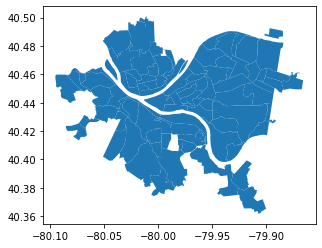

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

In [7]:
traffic_map = neighborhoods.merge(traffic_order, how='left', left_on='hood', right_on='neighborhood')
traffic_map[['hood','average_daily_car_traffic','geometry']].head(10)

,hood,average_daily_car_traffic,geometry
0,Central Oakland,11306.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,23821.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,0.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,29075.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,2305.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,63.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,12075.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


<AxesSubplot:>

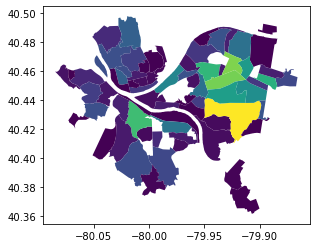

In [8]:
traffic_map.plot(column='average_daily_car_traffic')

<AxesSubplot:>

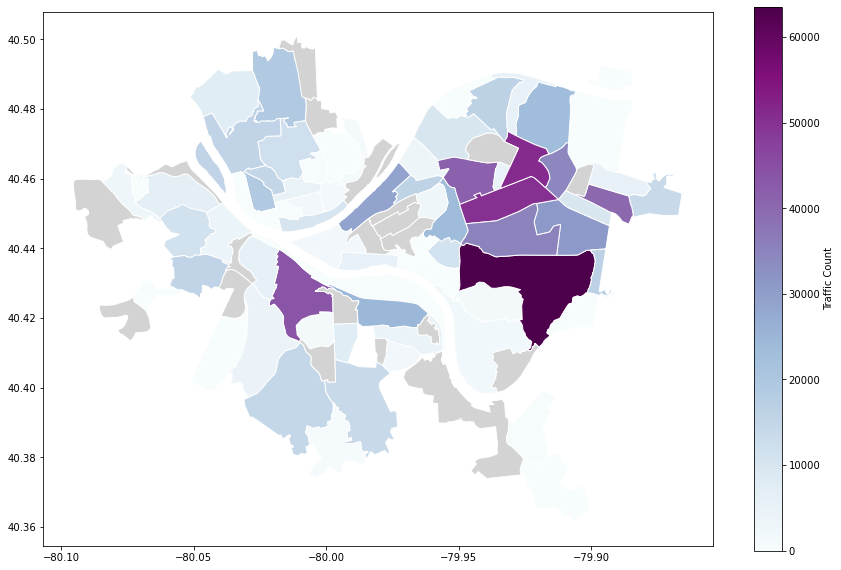

In [9]:
traffic_map.plot(column='average_daily_car_traffic', 
               cmap='BuPu',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Traffic Count"},
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )

# The Top 15 Neighborhoods With The Least Amount Of Traffic

1. Spring Hill-City View	
2. South Side Flats	
3. Lincoln Place	
4. Lincoln-Lemington-Belmar	
5. Fineview	
6. Allegheny West	
7. New Homestead	
8. Overbrook	
9. Spring Garden	
10. Greenfield	
11. Beltzhoover	
12. East Allegheny	
13. Hazelwood	
14. Central Business District	
15. Allegheny Center	

In conclusion, the "best" neighboorhood by the traffic metric is Spring Hill-City View, at an avergae of only 63 cars passing through. This is followed with a 52 car gap by South Side Flats at 115. Coming in 3rd, is Lincoln Place at 126. Suprisingly, one of the entries with an average of zero was Pitt campus' Oakland. I would have expected this to be one of the worst, as Forbes Avenue, as well as the Boulevard of the Allies runs through it, however the creators of the dataset may not have measured it. It doesn't, however, surprise me that the least driven-through neighborhoods are on the outskirts of the main city area.